<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

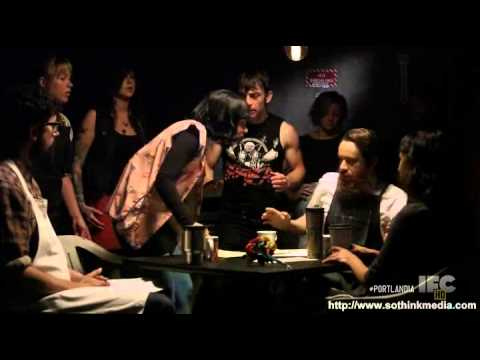

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/mnt/c/Users/Hakuj/Documents/GitHub/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head(25)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4.0 star rating
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating


Let's start with a little exploration.

In [22]:
shops.shape

(7616, 3)

In [16]:
shops.iloc[8].full_review_text

' 10/25/2016 1 check-in Ok, let\'s try this approach...  Pros: Music Seating Decor General ambiance Service  Cons: iPad ordering (I\'m a crotchety old man, kids) Limited coffee menu, or menu in general Relatively expensive Food is pretty but lackluster  I\'m still sitting here as I type this and I\'m less than overjoyed with the experience, sadly. The space and vibe are great but not quite familiar or intimate enough to beat out a place like Genuine Joe down the street. It seems like they bank on the vibe, and fall short the rest of the way. (This would be a great hangout for the artsy/design crowd having a collaborative meeting.)  The staff is great but the iPad ordering system limits your required interaction with them. They take pride in no wifi to increase interaction but then use iPads instead of people?  Seating is ample, if cramped in a surprisingly large space.  But the food, kids. So pretty, but again lackluster. I tried the Pop+art ($5) and the Nutella Waffle ($4.75) and they

In [17]:
shops.iloc[20].full_review_text

" 10/12/2016 1 check-in Checked out The Factory this past Sunday with my husband. We wanted to try their delicious looking waffles and were definitely not disappointed.  Husband ordered an iced coffee drink that was delicious, but it wasn't as good as my Golden Age of Milk Tea, well worth the 10 minute wait for the tea to steep.  We both ordered the Nutella Waffle and it was perfect. From the wood plate with the AMAZING paper liner printed with a famous person and an inspirational quote from them. I wanted just the paper because it was so cute and well done. The waffle is basically half a waffle, spread with Nutella and a layer of bananas, then folded in half. While small, it was a perfect amount, the bananas balancing out the sweetness of the Nutella. The waffle itself was crisp perfection, providing a crunch to the meal. The menu is very limited: there was the nutella waffle and a fried chicken waffle. I'm hoping they'll eventually serve other waffles, but totally respect their decis

So, some reviews have the yelp stuff tagged on to the end. That's unfortunate.

In [15]:
shops["coffee_shop_name"].unique()

array(['The Factory - Cafe With a Soul ',
       'The Marvelous Vintage Tea Party Co. ', 'Vintage Heart Coffee ',
       'Fleet Coffee ', 'Mozart’s Coffee Roasters ',
       'Summermoon Coffee Bar ', 'Monkey Nest Coffee ',
       'Apanas Coffee & Beer ', 'Corona Coffee ', 'Café Crème ',
       'Brian’s Brew ', 'Legend Coffee ', 'Venezia Italian Gelato ',
       'Epoch Coffee ', 'Houndstooth Coffee ', 'Caffé Medici ',
       'Flitch Coffee ', 'Caffe Medici ', 'Holy Grounds ',
       'Figure 8 Coffee Purveyors ', 'Mañana Coffee & Juice ',
       'Summer Moon Coffee Bar ', 'Fat Cats Organic Coffee And Dessert ',
       'Flat Track Coffee ', 'Mary’s Cafe ', 'Anderson’s Coffee Company ',
       'Flightpath Coffeehouse ', 'Third Coast Coffee Roasting Company ',
       'Bennu Coffee ', 'Dolce Neve ', 'Thunderbird Coffee ', 'Halcyon ',
       'Cherrywood Coffeehouse ', 'Jo’s Coffee ',
       'Arturo’s Underground Cafe ', 'Patika ', 'Cenote ',
       'The Hideout Coffeehouse ', 'Lucky Lab Coffe

In [18]:
shops["star_rating"].unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

## Cleaning 

So, I want to :
 - strip ".0 star rating"
 - seperate the date from the review
 - MAYBE get the "See all Photos from..." out

In [94]:
#REmoves junk from rating
shops["star_rating"] = shops["star_rating"].str.strip(".0 star rating").astype(int)

In [63]:
#Testing date extraction
shops.iloc[20].full_review_text.split(" ")[1]

'10/12/2016'

In [73]:
#Testing date extraction
shops['full_review_text'].str.split(" ")[0][1]

'11/25/2016'

In [67]:
#Starting a column for the date
shops['date'] = shops['full_review_text'].str.split(" ")[0][1]

In [129]:
#Remove dates along with other numbers and such nonsense
import re

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub(r'[^a-zA-Z ]', '', x))

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### Lemmatization

In [137]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
            
    return lemmas

In [138]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [141]:
#convert list to string
shops['lemmas'] = shops.lemmas.apply(" ".join)

### Tokenizing

In [83]:
import spacy 
from spacy.tokenizer import Tokenizer
nlp = spacy.load('en_core_web_lg')
tokenizer = Tokenizer(nlp.vocab)

In [149]:
tokens = []

for doc in tokenizer.pipe(shops['lemmas']):
    doc_tokens = [token.text.lower() for token in doc if (token.is_stop==False) & (token.is_punct==False) & (token.is_space==False)]
    tokens.append(doc_tokens)
shops['tokens'] = tokens
shops['tokens'].head()

0    [checkin, love, love, love, atmosphere, corner...
1    [list, date, night, austin, ambiance, austin, ...
2    [checkin, list, brunch, spots, love, eclectic,...
3    [cool, decor, good, drink, nice, seating, over...
4    [checkin, locate, northcross, mall, shopping, ...
Name: tokens, dtype: object

### Word counts

In [150]:
import squarify
import matplotlib.pyplot as plt
from collections import Counter

Let's create a column for the word counts

In [151]:
word_count = []
for row in shops['tokens']:
    word_count.append(len(row))
shops['word_count'] = word_count
shops['word_count'].head()

0     44
1     22
2    104
3     35
4     62
Name: word_count, dtype: int64

In [152]:
#Word counts of reviews for a shop with a 4 or more
shops[shops["star_rating"] > 3]['word_count'].describe()

count    6140.000000
mean       43.645765
std        33.565564
min         3.000000
25%        20.000000
50%        34.000000
75%        57.000000
max       391.000000
Name: word_count, dtype: float64

In [153]:
#Word counts of reviews for a shop with a 3 or less
shops[shops["star_rating"] <= 3]['word_count'].describe()

count    1476.000000
mean       50.090786
std        37.173289
min         2.000000
25%        24.000000
50%        41.000000
75%        65.000000
max       340.000000
Name: word_count, dtype: float64

In [109]:
#rewrite the fucntion from lecture
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    total_docs = len(docs)
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
    
    counts = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(counts, columns = ['word', 'count'])
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    appearances = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(appearances, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [154]:
counts = count(shops['tokens'])

In [155]:
counts.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
26,coffee,4924,10590,1.0,0.030972,0.030972,0.646534
131,place,3879,6022,2.0,0.017612,0.048585,0.509322
143,good,3584,5368,3.0,0.015700,0.064284,0.470588
56,great,2853,3946,4.0,0.011541,0.075825,0.374606
149,like,2259,3350,5.0,0.009798,0.085623,0.296612
28,checkin,2980,2996,6.0,0.008762,0.094385,0.391282
426,come,1930,2630,7.0,0.007692,0.102077,0.253414
35,love,1817,2372,8.0,0.006937,0.109014,0.238577
438,time,1749,2371,9.0,0.006934,0.115949,0.229648
2,drink,1617,2309,10.0,0.006753,0.122702,0.212316


In [156]:
counts.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
16296,walnutcranberry,1,1,16301.0,0.000003,0.999944,0.000131
16298,cinnamonheavy,1,1,16302.0,0.000003,0.999947,0.000131
16300,shelby,1,1,16303.0,0.000003,0.999950,0.000131
16303,jennifers,1,1,16304.0,0.000003,0.999953,0.000131
16304,met,1,1,16305.0,0.000003,0.999956,0.000131
16306,foodgasm,1,1,16306.0,0.000003,0.999959,0.000131
16301,lentil,1,1,16307.0,0.000003,0.999962,0.000131
16302,soupomg,1,1,16308.0,0.000003,0.999965,0.000131
16305,mum,1,1,16309.0,0.000003,0.999968,0.000131
16307,uneventful,1,1,16310.0,0.000003,0.999971,0.000131


Let's get rid of austen and some others

In [187]:
STOP_WORDS = nlp.Defaults.stop_words.union(['', 'checkin', ' austin', 'austin' "check-in", "check in", 'place'])

In [188]:
#check tokens in "STOP_WORDS"

def remove_STOP(docs):
    tokens = []

    for doc in tokenizer.pipe(docs):

        doc_tokens = []

        for token in doc: 
            if token.text.lower() not in STOP_WORDS:
                doc_tokens.append(token.text.lower())

        tokens.append(" ".join(doc_tokens))
    return tokens

In [189]:
shops.tokens = shops['tokens'].apply(remove_STOP)

In [190]:
shops.tokens

0       [, love, love, love, atmosphere, corner, coffe...
1       [list, date, night, austin, ambiance, austin, ...
2       [, list, brunch, spots, love, eclectic, homey,...
3       [cool, decor, good, drink, nice, seating, over...
4       [, locate, northcross, mall, shopping, center,...
5       [, cute, cafe, think, moment, step, find, cute...
6       [, list, nuptial, coffee, bliss, anderson, lan...
7       [, love, , star, cleanliness, star, fun, ambia...
8       [, ok, let, try, approach, pro, music, seating...
9       [, , social, medium, day, finally, visit, cut,...
10      [, list, americano, average, cute, study, spot...
11      [store, decoration, honestly, coffee, good, co...
12      [, list, time, charm, factory, decor, innovati...
13      [cute, little, cafe, drive, , time, notice, to...
14      [beautiful, eccentric, coffee, shop, library, ...
15      [, list, search, fantastic, coffee, want, writ...
16      [love, atmosphere, frequent, coffee, shop, def...
17      [, che

In [191]:
counts = count(shops['tokens'])

In [192]:
counts.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
27,coffee,4924,10590,1.0,0.030972,0.030972,0.646534
0,,5159,9018,2.0,0.026375,0.057347,0.677390
142,good,3584,5368,3.0,0.015700,0.073047,0.470588
56,great,2853,3946,4.0,0.011541,0.084587,0.374606
148,like,2259,3350,5.0,0.009798,0.094385,0.296612
425,come,1930,2630,6.0,0.007692,0.102077,0.253414
35,love,1817,2372,7.0,0.006937,0.109014,0.238577
437,time,1749,2371,8.0,0.006934,0.115949,0.229648
2,drink,1617,2309,9.0,0.006753,0.122702,0.212316
54,austin,1794,2260,10.0,0.006610,0.129311,0.235557


In [177]:
counts.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
16296,walnutcranberry,1,1,16301.0,0.000003,0.999944,0.000131
16298,cinnamonheavy,1,1,16302.0,0.000003,0.999947,0.000131
16300,shelby,1,1,16303.0,0.000003,0.999950,0.000131
16303,jennifers,1,1,16304.0,0.000003,0.999953,0.000131
16304,met,1,1,16305.0,0.000003,0.999956,0.000131
16306,foodgasm,1,1,16306.0,0.000003,0.999959,0.000131
16301,lentil,1,1,16307.0,0.000003,0.999962,0.000131
16302,soupomg,1,1,16308.0,0.000003,0.999965,0.000131
16305,mum,1,1,16309.0,0.000003,0.999968,0.000131
16307,uneventful,1,1,16310.0,0.000003,0.999971,0.000131


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


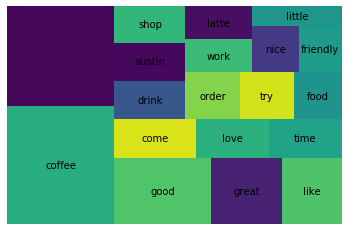

In [194]:
top20 = counts[counts['rank'] < 20]

squarify.plot(sizes=top20['pct_total'], label=top20['word'])
plt.axis('off')
plt.show()

Now, Let's see if we can't associate words to stars

In [222]:
shops[shops.lemmas.str.contains('good')]['star_rating'].mean()

4.191318772463368

In [233]:
#ok, let's turn that into a function of some sort
def avg_rating(df, words):
    ratings = []
    for word in words:
        ratings.append(shops[shops.lemmas.str.contains(word)]['star_rating'].mean())
#     combined = zip(words, ratings)
#     pairing = pd.DataFrame(combined, columns=['word', 'rating'])
#     return pairing
    return ratings

In [241]:
top20['avg_rating'] = avg_rating(shops, top20['word'])

/home/hakujou/anaconda3/envs/u4s1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [242]:
top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,avg_rating
27,coffee,4924,10590,1.0,0.030972,0.030972,0.646534,4.179684
0,,5159,9018,2.0,0.026375,0.057347,0.677390,4.169118
142,good,3584,5368,3.0,0.015700,0.073047,0.470588,4.191319
56,great,2853,3946,4.0,0.011541,0.084587,0.374606,4.355501
148,like,2259,3350,5.0,0.009798,0.094385,0.296612,3.960409
425,come,1930,2630,6.0,0.007692,0.102077,0.253414,4.050856
35,love,1817,2372,7.0,0.006937,0.109014,0.238577,4.432143
437,time,1749,2371,8.0,0.006934,0.115949,0.229648,4.032787
2,drink,1617,2309,9.0,0.006753,0.122702,0.212316,4.073099
54,austin,1794,2260,10.0,0.006610,0.129311,0.235557,4.142857


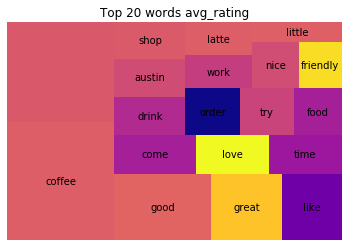

In [253]:
import matplotlib
cmap = matplotlib.cm.plasma
mini=min(top20['avg_rating'])
maxi=max(top20['avg_rating'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in top20['avg_rating']]
squarify.plot(sizes=top20['pct_total'], label=top20['word'], color=colors)
plt.axis('off')
plt.title("Top 20 words avg_rating")
plt.show()

In [254]:
counts['avg_rating'] = avg_rating(shops, counts['word'])

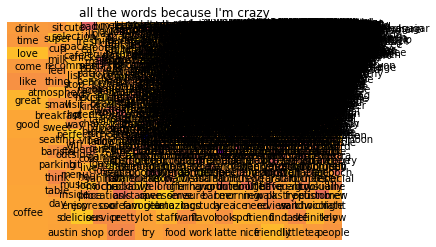

In [292]:
cmap = matplotlib.cm.plasma
mini=min(counts['avg_rating'])
maxi=max(counts['avg_rating'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in counts['avg_rating']]
squarify.plot(sizes=counts['pct_total'], label=top20['word'], color=colors)
plt.axis('off')
plt.title("all the words because I'm crazy")
plt.show()

In [286]:
lows = list(counts.sort_values(by=['avg_rating']).head()['word'].values)

In [289]:
highs = list(counts.sort_values(by=['avg_rating'], ascending=False).head()['word'].values)

In [291]:
bigdiff = lows + highs

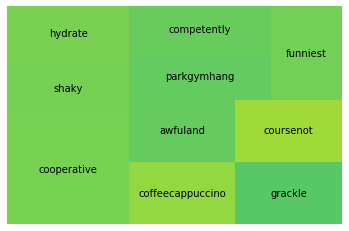

In [310]:
cmap = matplotlib.cm.viridis
mini=min(counts['avg_rating'])
maxi=max(counts['avg_rating'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in counts['avg_rating']]
squarify.plot(sizes=(counts[counts['word'].isin(bigdiff)]['pct_total']),
              label=(counts[counts['word'].isin(bigdiff)]['word']), color=colors)
plt.axis('off')
plt.title("")
plt.show()

In [308]:
counts[counts['word'].isin(bigdiff)]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,avg_rating
1643,cooperative,2,2,6475.0,0.000006,0.965787,0.000263,5.0
9416,shaky,1,1,11271.0,0.000003,0.985236,0.000131,5.0
9424,hydrate,1,1,11272.0,0.000003,0.985239,0.000131,5.0
9431,coffeecappuccino,1,1,11275.0,0.000003,0.985248,0.000131,5.0
9879,grackle,1,1,11387.0,0.000003,0.985576,0.000131,5.0
14460,awfuland,1,1,14713.0,0.000003,0.995303,0.000131,1.0
15025,coursenot,1,1,15193.0,0.000003,0.996707,0.000131,1.0
15024,parkgymhang,1,1,15194.0,0.000003,0.996710,0.000131,1.0
15035,competently,1,1,15204.0,0.000003,0.996739,0.000131,1.0
15036,funniest,1,1,15205.0,0.000003,0.996742,0.000131,1.0


In [305]:
counts[counts['word'].isin(bigdiff)]['pct_total']

1643     0.000006
9416     0.000003
9424     0.000003
9431     0.000003
9879     0.000003
14460    0.000003
15025    0.000003
15024    0.000003
15035    0.000003
15036    0.000003
Name: pct_total, dtype: float64

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

